## Data Preparation


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

#include utils directory
import sys
sys.path.append('..')

from utils.files import *
DATA_PATH = os.path.join('..', 'data')

from utils.metrics import *

In [30]:
# Players
players_teams_df = pd.read_csv(os.path.join(DATA_PATH, DATA_PLAYERS_TEAMS))
pt_df = preparePlayersTeamsDf(players_teams_df)

new_pt_df = pd.DataFrame()
for col in ['playerID', 'year', 'tmID']:
    new_pt_df[col] = pt_df[col]

teams_df = pd.read_csv(os.path.join(DATA_PATH, DATA_TEAMS))
teams_df = prepareTeamsDf(teams_df)

getPer(new_pt_df, pt_df, teams_df) #defined in metrics.py
getEFF(new_pt_df, pt_df) #defined in metrics.py

display(new_pt_df)

# get the average stats for players the previous year
merged_df = teams_df[['year', 'tmID', 'playoff']].copy()
for index, row in merged_df.iterrows():
    merged_df.loc[index, 'per'] = new_pt_df[(new_pt_df['year'] == row['year'] - 1) & (new_pt_df['tmID'] == row['tmID'])]['PER'].sum()
    merged_df.loc[index, 'eff'] = new_pt_df[(new_pt_df['year'] == row['year'] - 1) & (new_pt_df['tmID'] == row['tmID'])]['EFF'].sum()


,playerID,year,tmID,PER,EFF
0,abrossv01w,2,MIN,21.050648,0.379433
1,abrossv01w,3,MIN,15.237793,0.277019
2,abrossv01w,4,MIN,20.039299,0.368177
3,abrossv01w,5,MIN,15.943110,0.304348
4,abrossv01w,6,MIN,17.684842,0.332046
...,...,...,...,...,...
1871,zakalok01w,3,PHO,-8.567689,-0.027027
1872,zarafr01w,6,SEA,11.926119,0.243736
1873,zellosh01w,10,DET,24.142646,0.429778
1874,zirkozu01w,4,WAS,18.774724,0.333333


In [31]:
merged_df['playoff'] = merged_df['playoff'].eq('Y').mul(1)
merged_df = merged_df.select_dtypes(['number']) # Remove later
merged_df.dropna(axis=0, inplace=True)
merged_df.head()

print(merged_df.shape)
merged_df.head()

(142, 4)


,year,playoff,per,eff
0,9,0,0.000000,0.000000
1,10,1,219.722215,4.642656
2,1,0,0.000000,0.000000
3,2,1,185.796930,3.983925
4,3,1,161.314610,3.436282


PER and EFF correlation: 0.97


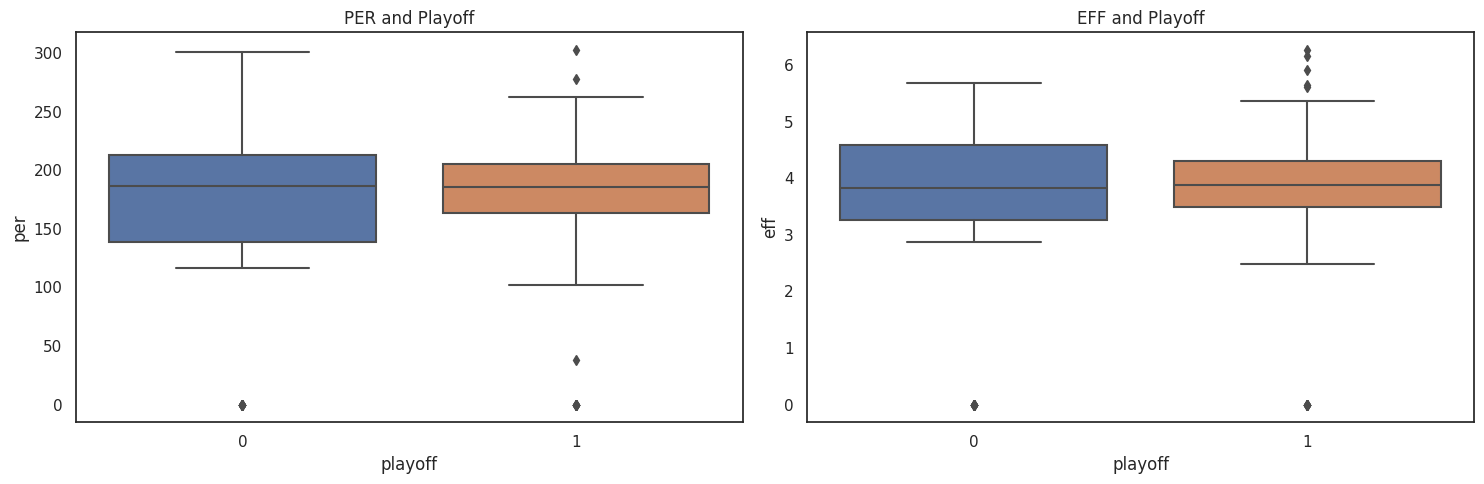

In [32]:
corr = merged_df['per'].corr(merged_df['eff'])
print(f"PER and EFF correlation: {round(corr, 3)}")

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Create a box plot for PER and Playoff
sb.boxplot(x='playoff', y='per', data=merged_df, ax=axes[0])
axes[0].set_title('PER and Playoff')

# Create a box plot for EFF and Playoff
sb.boxplot(x='playoff', y='eff', data=merged_df, ax=axes[1])
axes[1].set_title('EFF and Playoff')

# Adjust the layout
plt.tight_layout()
plt.show()

In [33]:
# Save the result to a new CSV file
merged_df.to_csv(os.path.join(DATA_PATH, DATA_MERGED), index=False)

### References

<a id="ref1"></a> [1] Maroun, E. (2012, March 7). Understanding advanced statistics: player efficiency rating. Hardwood Paroxysm. https://web.archive.org/web/20170910105350/https://hardwoodparoxysm.com/2012/03/07/understanding-advanced-statistics-player-efficiency-rating/

<a id="ref2"></a> [2] Calculating PER | Basketball-Reference.com. (n.d.). Basketball-Reference.com. https://www.basketball-reference.com/about/per.html